<a href="https://colab.research.google.com/github/rizkamars/Analisis-Performa-Model-Linear-Regression-dan-SVM-dalam-Prediksi-Harga-Saham-BBCA/blob/main/Analisis%20Performa%20Model%20Linear%20Regression%20dan%20SVM%20dalam%20Prediksi%20Harga%20Saham%20BBCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PENGUMPULAN DATA

In [ ]:
# Import libraries
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# PENGUMPULAN DATA

# Daftar kode saham LQ45 terbaru
lq45_tickers = ['BBCA']
lq45_tickers_yf = [ticker + '.JK' for ticker in lq45_tickers]

# Tanggal mulai dan akhir eksplisit
start_date = datetime.datetime(2022, 6, 1)
end_date = datetime.datetime(2025, 6, 1)

data_saham = yf.download(
    tickers=lq45_tickers_yf,
    start=start_date,
    end=end_date,
    interval='1d',
    group_by='ticker',
    auto_adjust=True,
    threads=True
)

data_saham_lq45 = pd.DataFrame()

for ticker in lq45_tickers:
    ticker_yf = ticker + '.JK'
    if ticker_yf in data_saham.columns.levels[0]:
        df = data_saham[ticker_yf].copy()
        df['Kode'] = ticker
        df['Tanggal'] = df.index
        data_saham_lq45 = pd.concat([data_saham_lq45, df])

data_saham_lq45.reset_index(drop=True, inplace=True)
data_saham_lq45 = data_saham_lq45[['Tanggal', 'Kode', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Tampilkan data yang diambil untuk memastikan pengumpulan data berhasil
print("=== TABEL DATA SAHAM ===")
print(data_saham_lq45.head())

# Simpan data ke file CSV
data_saham_lq45.to_csv("Saham_BBCA.csv", index=False)

[*********************100%***********************]  1 of 1 completed

=== TABEL DATA SAHAM ===
Price    Tanggal  Kode         Open         High          Low        Close  \
0     2022-06-02  BBCA  6993.086775  7038.943082  6901.374162  6947.230469   
1     2022-06-03  BBCA  6970.158691  7038.943152  6947.230538  6970.158691   
2     2022-06-06  BBCA  6924.301964  6947.230116  6809.661203  6832.589355   
3     2022-06-07  BBCA  6695.020716  6855.517788  6695.020716  6763.805176   
4     2022-06-08  BBCA  6878.446077  6970.158691  6809.661616  6970.158691   

Price     Volume  
0      149226300  
1       80563100  
2       81140300  
3      129242500  
4      108910500  


In [ ]:
data_saham_lq45.head()

Price,Tanggal,Kode,Open,High,Low,Close,Volume
0,2022-06-02,BBCA,6993.086775,7038.943082,6901.374162,6947.230469,149226300
1,2022-06-03,BBCA,6970.158691,7038.943152,6947.230538,6970.158691,80563100
2,2022-06-06,BBCA,6924.301964,6947.230116,6809.661203,6832.589355,81140300
3,2022-06-07,BBCA,6695.020716,6855.517788,6695.020716,6763.805176,129242500
4,2022-06-08,BBCA,6878.446077,6970.158691,6809.661616,6970.158691,108910500


# PREPROCESSING

In [ ]:
# PREPROCESSING

# Data preprocessing
df = data_saham_lq45.copy()
df = df.sort_values('Tanggal')

# Buat lag features
df['Close_t-1'] = df['Close'].shift(1)
df['Close_t-2'] = df['Close'].shift(2)
df['Close_t-3'] = df['Close'].shift(3)

# Drop baris yang mengandung NaN akibat shift
df.dropna(inplace=True)

# Feature & Target
X = df[['Close_t-1', 'Close_t-2', 'Close_t-3']]
y = df['Close']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PEMBAGIAN DATA

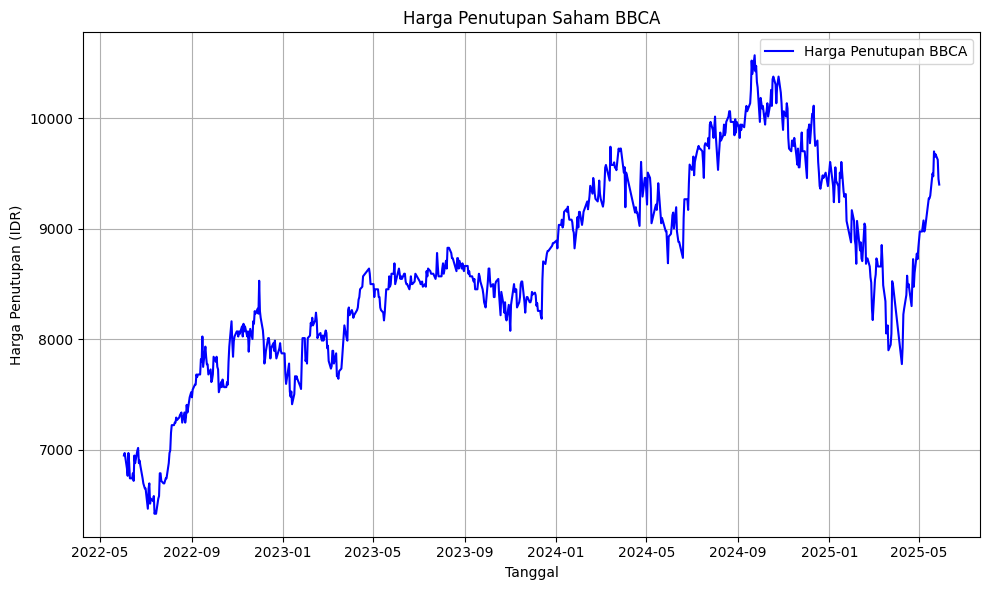

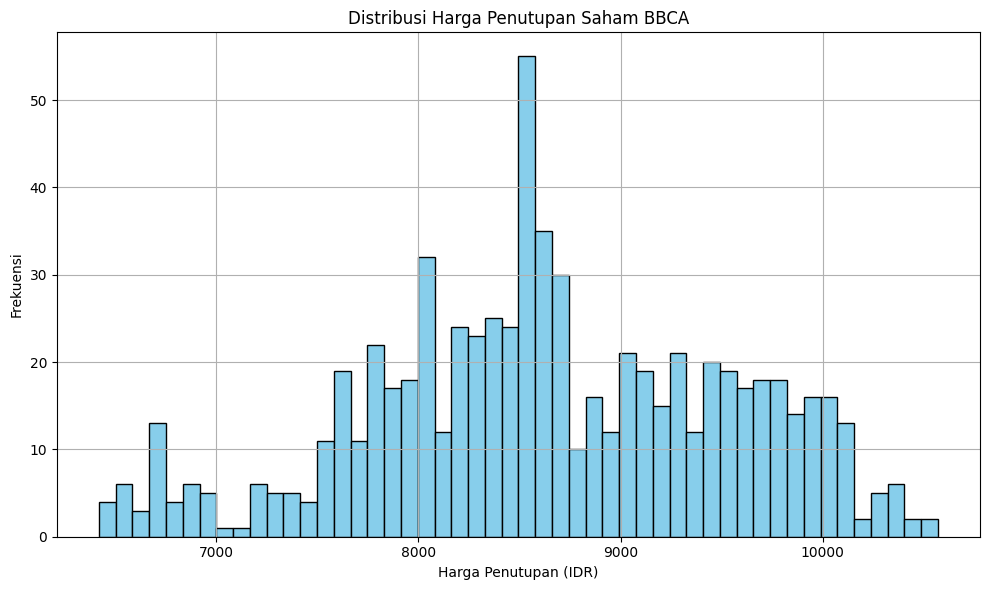

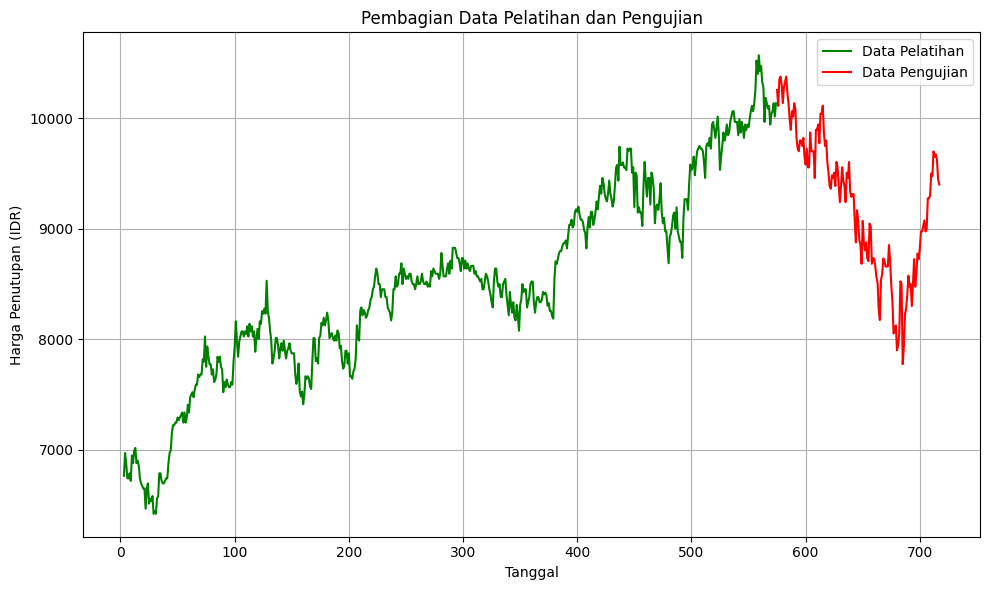

In [ ]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# VISUALISASI DATA PREPROCESSING

# Visualisasi harga penutupan saham BBCA
plt.figure(figsize=(10, 6))
plt.plot(data_saham_lq45['Tanggal'], data_saham_lq45['Close'], label='Harga Penutupan BBCA', color='blue')
plt.title('Harga Penutupan Saham BBCA')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (IDR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi distribusi harga penutupan
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Penutupan Saham BBCA')
plt.xlabel('Harga Penutupan (IDR)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pembagian data pelatihan dan pengujian
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Data Pelatihan', color='green')
plt.plot(y_test.index, y_test.values, label='Data Pengujian', color='red')
plt.title('Pembagian Data Pelatihan dan Pengujian')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (IDR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

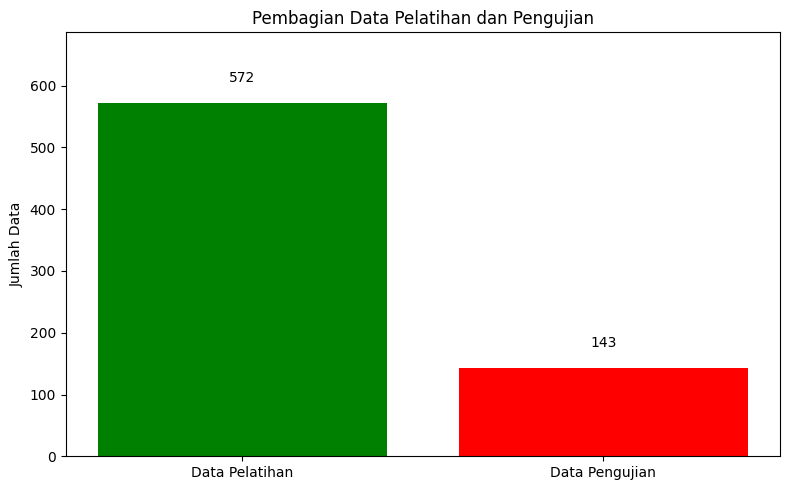


Jumlah data pelatihan: 572
Jumlah data pengujian: 143
Total jumlah data setelah dropna: 715
Total jumlah data sebelum dropna: 718


In [ ]:
# prompt: berikan visualisasi bar chart pada pembagian data dan berikan angka yang dbagi

import numpy as np

# Hitung jumlah data pelatihan dan pengujian
n_train = len(X_train)
n_test = len(X_test)

# Buat label dan ukuran data untuk bar chart
labels = ['Data Pelatihan', 'Data Pengujian']
sizes = [n_train, n_test]
colors = ['green', 'red']

# Visualisasi menggunakan bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, sizes, color=colors)
plt.title('Pembagian Data Pelatihan dan Pengujian')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(sizes) * 1.2) # Memberikan sedikit ruang di atas bar

# Menambahkan angka pada bar chart
for i, size in enumerate(sizes):
    plt.text(i, size + max(sizes)*0.05, str(size), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nJumlah data pelatihan: {n_train}")
print(f"Jumlah data pengujian: {n_test}")
print(f"Total jumlah data setelah dropna: {n_train + n_test}")
print(f"Total jumlah data sebelum dropna: {len(data_saham_lq45)}")

# MODELLING

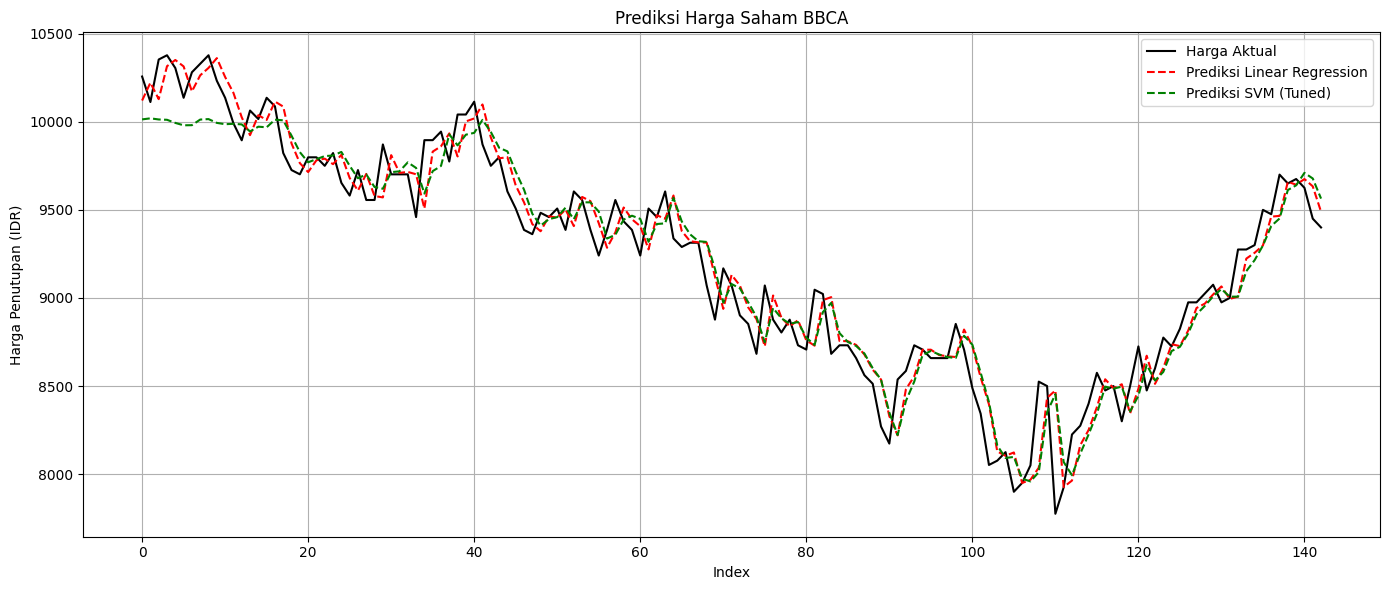

In [ ]:
# MODELLING

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Support Vector Machine (SVM) Model
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# VISUALISASI PERBANDINGAN PREDIKSI

# Visualisasi perbandingan antara harga aktual dan prediksi untuk kedua model
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Harga Aktual', color='black')
plt.plot(y_pred_lr, label='Prediksi Linear Regression', linestyle='--', color='red')
plt.plot(y_pred_svm, label='Prediksi SVM (Tuned)', linestyle='--', color='green')
plt.title("Prediksi Harga Saham BBCA")
plt.xlabel("Index")
plt.ylabel("Harga Penutupan (IDR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# EVALUASI

=== EVALUASI MODEL ===
               Model         MAE        RMSE      MAPE        R²
0  Linear Regression  128.240436  165.837320  0.014113  0.932256
1        SVM (Tuned)  147.949320  183.372057  0.016148  0.917173


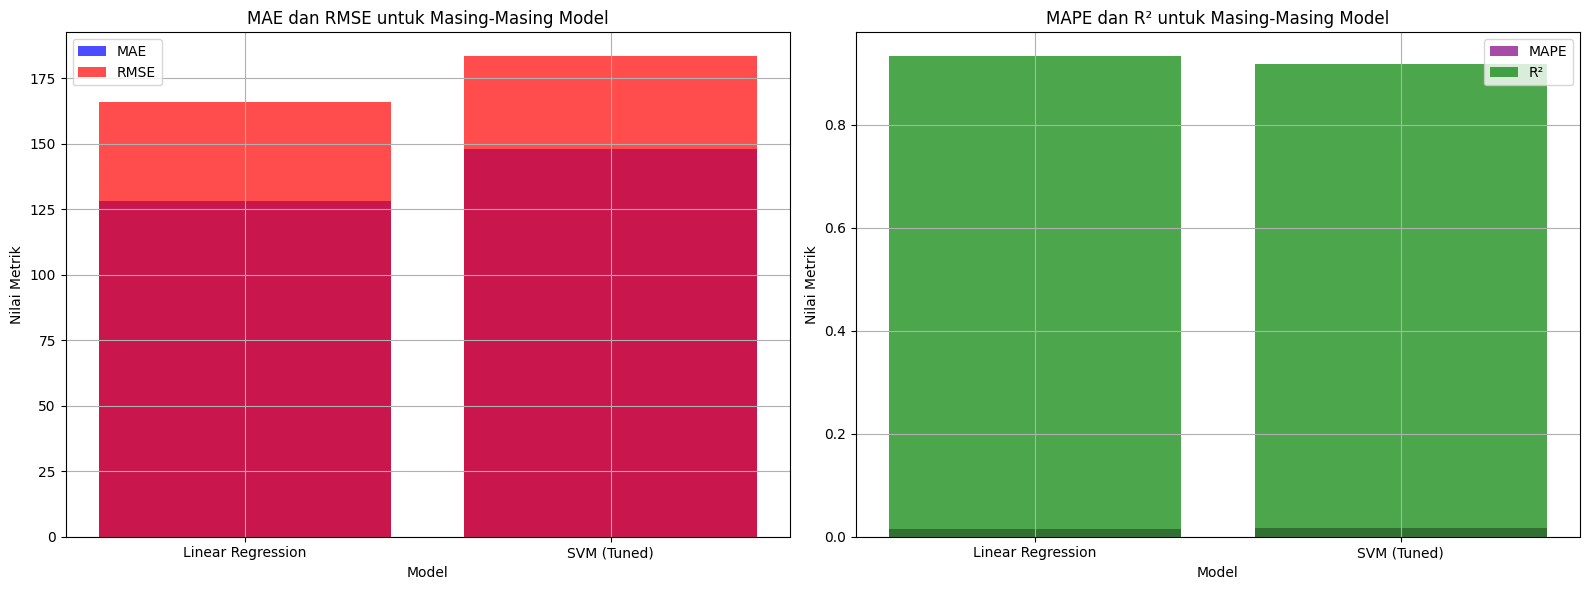

In [ ]:
# EVALUASI MODEL

# Menghitung metrik evaluasi untuk Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Menghitung metrik evaluasi untuk SVM
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Tampilkan hasil evaluasi dalam bentuk tabel menggunakan pandas
evaluation_data = {
    'Model': ['Linear Regression', 'SVM (Tuned)'],
    'MAE': [mae_lr, mae_svm],
    'RMSE': [rmse_lr, rmse_svm],
    'MAPE': [mape_lr, mape_svm],
    'R²': [r2_lr, r2_svm]
}

evaluation_df = pd.DataFrame(evaluation_data)
print("=== EVALUASI MODEL ===")
print(evaluation_df)

# VISUALISASI EVALUASI MODEL

# Bar Chart untuk MAE dan RMSE
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart untuk MAE dan RMSE
axs[0].bar(evaluation_df['Model'], evaluation_df['MAE'], color='blue', alpha=0.7, label='MAE')
axs[0].bar(evaluation_df['Model'], evaluation_df['RMSE'], color='red', alpha=0.7, label='RMSE')
axs[0].set_title('MAE dan RMSE untuk Masing-Masing Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Nilai Metrik')
axs[0].legend()
axs[0].grid(True)

# Bar Chart untuk MAPE dan R²
axs[1].bar(evaluation_df['Model'], evaluation_df['MAPE'], color='purple', alpha=0.7, label='MAPE')
axs[1].bar(evaluation_df['Model'], evaluation_df['R²'], color='green', alpha=0.7, label='R²')
axs[1].set_title('MAPE dan R² untuk Masing-Masing Model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Nilai Metrik')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# INSIGHT

Grafik menunjukkan bahwa Linear Regression memberikan prediksi yang lebih akurat dan konsisten, terutama pada data dengan pergerakan harga yang stabil dan linier. Sebaliknya, SVM (Tuned) lebih responsif terhadap fluktuasi harga, tetapi tidak selalu lebih akurat pada data dengan pola linier.

Analisis Evaluasi Model :
Linear Regression menunjukkan akurasi yang lebih baik dengan MAE dan RMSE yang lebih rendah dibandingkan SVM (Tuned). MAPE untuk kedua model menunjukkan kesalahan prediksi yang rendah. R² menunjukkan bahwa Linear Regression lebih baik dalam menjelaskan variasi data, meskipun SVM (Tuned) sedikit lebih unggul pada beberapa titik data.